#Classifying Heart Disease Patients

![替代文字](https://www.vinu.edu/documents/10181/3682472/hospital-medical-tech.jpg/5cc81949-8100-4ee6-8fb7-773bbd08bad4?t=1473431512933)

**Data: This is a small, easy to understand set of data about heart disease and realted physical features.**

**Goal: In this project, I try to analyze people's  physical features and figure out the relationship between these features and heart disease. Then, find an appropriate model to predict whether a certain patient has heart disease.** 


#Ingestion

In [0]:
# for data preparation & plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# for models
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/fangqiqiqi/Discussion2/master/heart.csv')

In [0]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [0]:
data1 = data[data.target == 1]
data1.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [0]:
data0 = data[data.target == 0]
data0.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2,0
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0


#EDA

##*Age



/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


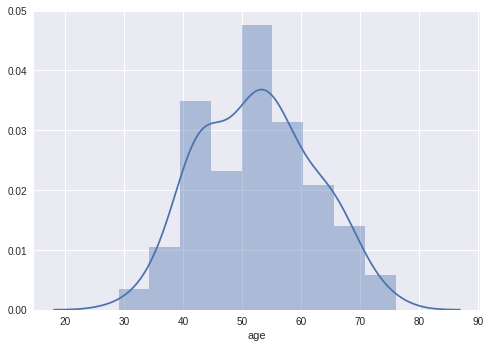

In [0]:
sns.distplot(data1.age)

##*Gender
The person's sex (1 = male, 0 = female)



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


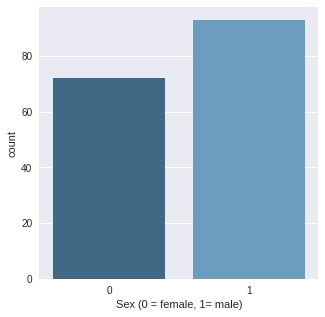

In [0]:
plt.figure(figsize=(5,5))
sns.countplot(x='sex', data=data1, palette = "Blues_d")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

##The chest pain experienced 
(1: typical angina, 2: atypical angina,3: non-anginal pain, 0: asymptomatic)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


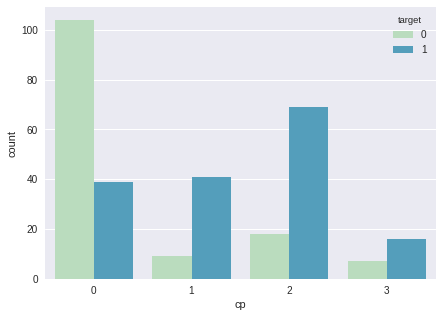

In [0]:
plt.figure(figsize=(7,5))
sns.countplot(x='cp',data = data, hue = 'target',palette='GnBu')
plt.show()

##Resting blood pressure

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


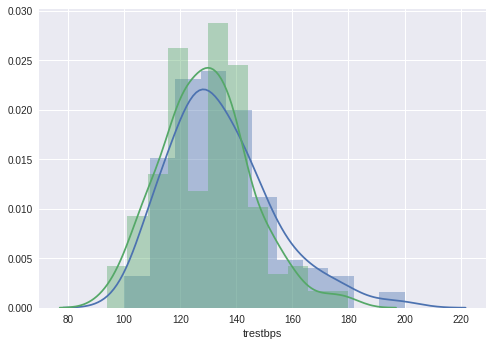

In [0]:
fig, ax = plt.subplots()
sns.distplot(data0.trestbps, ax = ax)
sns.distplot(data1.trestbps, ax = ax)

##Cholesterol

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


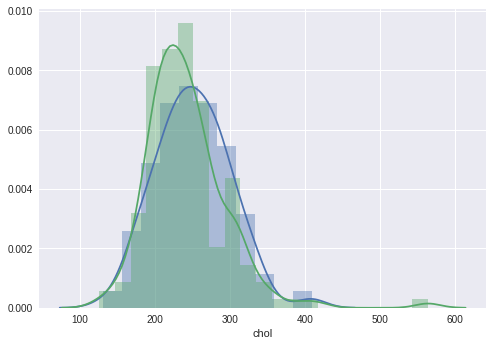

In [0]:
fig, ax = plt.subplots()
sns.distplot(data0.chol, ax = ax)
sns.distplot(data1.chol, ax = ax)

##Fasting blood sugar 
(> 120 mg/dl, 1 = true; 0 = false)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


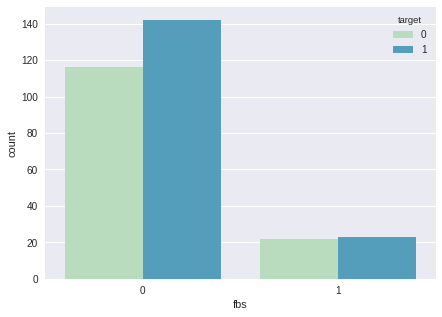

In [0]:
plt.figure(figsize=(7,5))
sns.countplot(x='fbs',data = data, hue = 'target',palette='GnBu')
plt.show()

 ## Resting electrocardiographic measurement
 (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


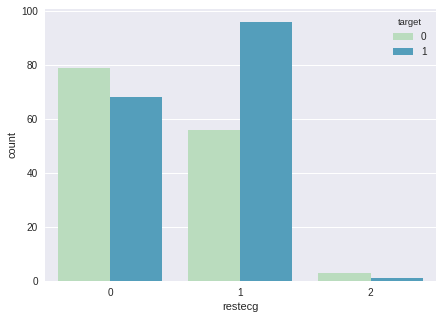

In [0]:
plt.figure(figsize=(7,5))
sns.countplot(x='restecg',data = data, hue = 'target',palette='GnBu')
plt.show()

##*Maximum heart rate achieved

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


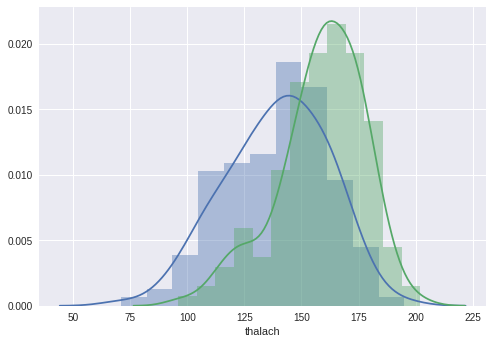

In [0]:
fig, ax = plt.subplots()
sns.distplot(data0.thalach, ax = ax)
sns.distplot(data1.thalach, ax = ax)

##Exercise induced angina 
(1 = yes; 0 = no)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


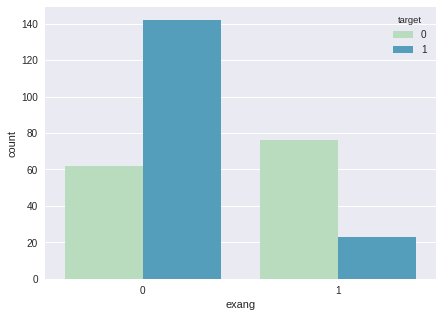

In [0]:
plt.figure(figsize = (7, 5))
sns.countplot(x = 'exang',data = data, hue = 'target', palette = 'GnBu')
plt.show()

##ST depression induced by exercise relative to rest 
('ST' relates to positions on the ECG plot）

blue：data0, green：data1

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


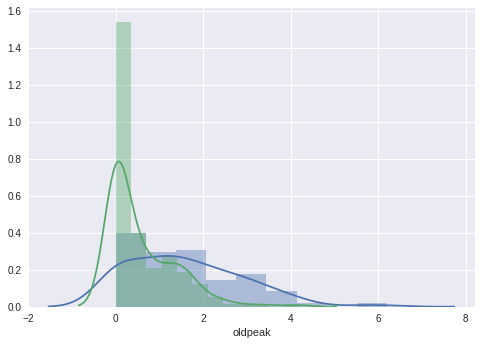

In [0]:
figure, ax = plt.subplots()
sns.distplot(data0.oldpeak, ax = ax)
sns.distplot(data1.oldpeak, ax = ax)

##The slope of the peak exercise ST segment 
(Value 1: upsloping, Value 2: flat, Value 3: downsloping)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


<function matplotlib.pyplot.show>

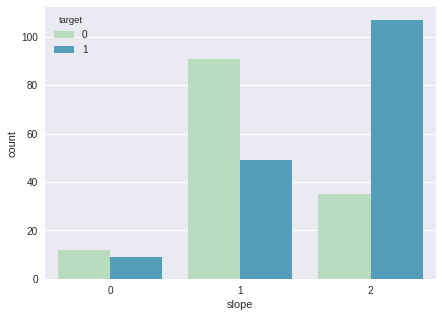

In [0]:
plt.figure(figsize = (7, 5))
sns.countplot(x = 'slope', data = data, hue = 'target', palette = 'GnBu')
plt.show

##The number of major vessels 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


<function matplotlib.pyplot.show>

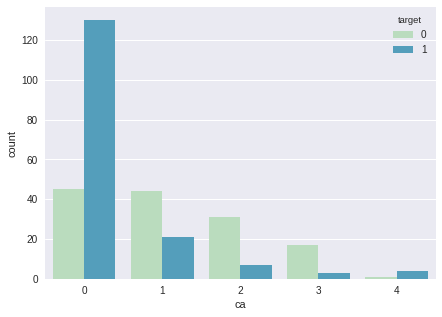

In [0]:
plt.figure(figsize = (7, 5))
sns.countplot(x = 'ca', data = data, hue = 'target', palette = 'GnBu')
plt.show

##A blood disorder called thalassemia(Heredity feature)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


<function matplotlib.pyplot.show>

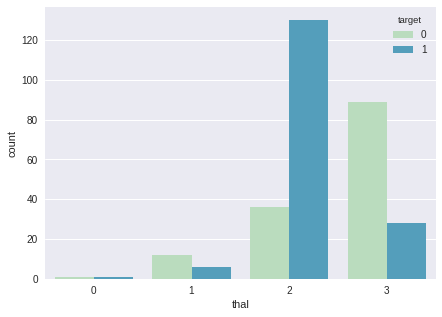

In [0]:
plt.figure(figsize = (7, 5))
sns.countplot(x = 'thal', data = data, hue = 'target', palette = 'GnBu')
plt.show

## Data Preparation

Rename the variables


In [0]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [0]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 1] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 4] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'
data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 1] = 'upsloping'
data['st_slope'][data['st_slope'] == 2] = 'flat'
data['st_slope'][data['st_slope'] == 3] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'normal'
data['thalassemia'][data['thalassemia'] == 2] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykerne

In [0]:
data.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

Create dummy variables


In [0]:
df = pd.get_dummies(data, drop_first=True)
df.head(10)

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0
5,57,140,192,148,0.4,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0
6,56,140,294,153,1.3,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0
7,44,120,263,173,0.0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1
8,52,172,199,162,0.5,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1
9,57,150,168,174,1.6,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0


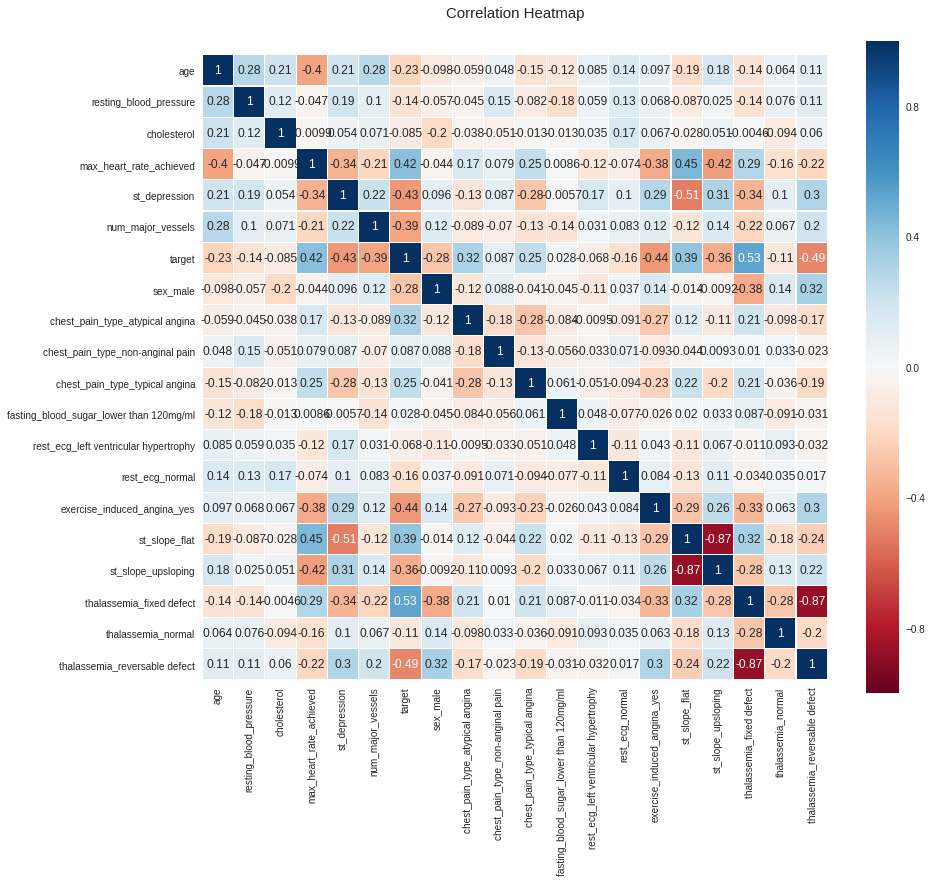

In [0]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation Heatmap', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Split and scale the data

In [0]:
X= df.drop('target',axis=1)
y=df['target']
#split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=10)

In [0]:
#scale the data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
X_train.shape

(242, 19)

#Models


![替代文字](http://1.bp.blogspot.com/-ME24ePzpzIM/UQLWTwurfXI/AAAAAAAAANw/W3EETIroA80/s1600/drop_shadows_background.png)

In [0]:
model1 = LinearSVC()
model1.fit(X_train, y_train)
predict1 = model1.predict(X_test)
print("Linear SVC Accuracy Score :", accuracy_score(y_test, predict1))

Linear SVC Accuracy Score : 0.819672131147541


In [0]:
knn =KNeighborsClassifier()
params = {'n_neighbors':[i for i in range(1,33,2)]}

In [0]:
model2 = GridSearchCV(knn,params,cv=10, iid = False)
model2.fit(X_train,y_train)
predict2 = model2.predict(X_test)
print('KNeighbors Classifier Accuracy Score: ',accuracy_score(y_test,predict2))

KNeighbors Classifier Accuracy Score:  0.819672131147541


In [0]:
model2.best_params_

{'n_neighbors': 21}

In [0]:
model3 = SVC(gamma = 'scale')
model3.fit(X_train, y_train)
predict3 = model3.predict(X_test)
print("SVC Accuracy Score:", accuracy_score(y_test,predict3))

SVC Accuracy Score: 0.8360655737704918


In [0]:
model4 = RandomForestClassifier(n_estimators = 100, max_depth=5)
model4.fit(X_train, y_train)
predict4 = model4.predict(X_test)
print("Random Forest Classifier Accuracy Score:", accuracy_score(y_test, predict4))

Random Forest Classifier Accuracy Score: 0.8524590163934426


In [0]:
model5= GaussianNB()
model5.fit(X_train, y_train)
predict5 = model5.predict(X_test)
print("Naive Bayes Accuracy Score:",accuracy_score(y_test, predict5))

Naive Bayes Accuracy Score: 0.8360655737704918


In [0]:
model6 = LogisticRegression(solver = 'liblinear')
model6.fit(X_train,y_train)
predict6 = model6.predict(X_test)
print("Logistic Regression Accuracy Score:", accuracy_score(y_test, predict6))

Logistic Regression Accuracy Score: 0.8524590163934426


In [0]:
d = {"Linear SVC " : accuracy_score(y_test, predict1),'KNeighbors Classifier ':accuracy_score(y_test,predict2),
    "SVC": accuracy_score(y_test,predict3),"Random Forest Classifier": accuracy_score(y_test, predict4),
    "Naive Bayes" :accuracy_score(y_test, predict5),"Logistic Regression": accuracy_score(y_test, predict6)}
scores = pd.DataFrame(data = d, index = [0])
scores = scores.T
scores.columns = ['Accuracy Score']
scores


,Accuracy Score
KNeighbors Classifier,0.819672
Linear SVC,0.819672
Logistic Regression,0.852459
Naive Bayes,0.836066
Random Forest Classifier,0.852459
SVC,0.836066


In [0]:
cm_model1 = confusion_matrix(y_test,predict1)
cm_model2 = confusion_matrix(y_test,predict2)
cm_model3 = confusion_matrix(y_test,predict3)
cm_model4 = confusion_matrix(y_test,predict4)
cm_model5 = confusion_matrix(y_test,predict5)
cm_model6 = confusion_matrix(y_test,predict6)

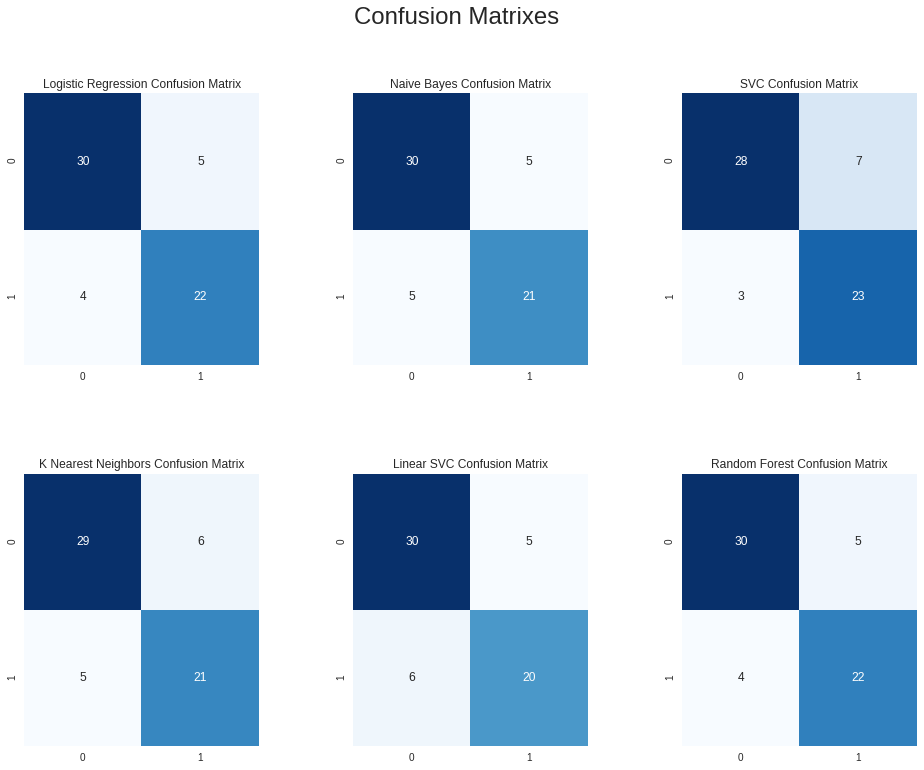

In [0]:
plt.figure(figsize=(16,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_model6,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,2)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_model5,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,3)
plt.title("SVC Confusion Matrix")
sns.heatmap(cm_model3,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,4)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_model2,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,5)
plt.title("Linear SVC Confusion Matrix")
sns.heatmap(cm_model1,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_model4,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.show()

#Conclusion


**EDA:**

The peak period for heart disease is between the ages of 40 and 50.

High cholesterol, high blood pressure, increasing age, male gender and heredity are also main features lead to heart disease.

Note that thalassemia, one of the variables in this dataset, is heredity.

The more major vessels is a good thing, and therefore will reduce the probability of heart disease.

**Models:**

Logistic Regression has the highest accuracy score, 85.25%

SVC and Naive Bayes share a same score

Linear SVC, Random Forest and KNeighbors have the same accuracy level.

**Next Steps:**

How to find more efficient and clear ways to conduct EDA for this data set.

Find more data and use more methods to evaluate the models.



